M8O-402Б-21 Кириченко Александра

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_moons
from plot_region import *
import matplotlib.pyplot as plt

Сгенерировать данные в виде полумесяцев. Количество образцов 300, шум 0.3, random_state=0
Разбить данные в соотношении 7/3, random_state=12

In [2]:
X,y = make_moons(n_samples=300, noise=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

Найти оптимальное значение гиперпараметра gamma (поиск в пределах 0.1-5, с шагом 0.1), которое показывает максимальную точность на кросс-валидации в 5 блоков для алгоритма SVC с ядром RBF. 
* Вывести значение найденного гиперпараметра. 
* Отобразить таблицу по результатам подбора гиперпараметров - метод GetDfFromCvResults (включен в файл plot_region, принимает параметр grid_search).
* Вывести точность на отложенных данных
* Отобразить границу разделяющей кривой (PlotResultRegion(Обученный классификатор, X, y, h=0.02))

Лучшее значение gamma: 0.9
    mean_test_score  mean_fit_time  param_gamma
0          0.819048       0.000000          0.1
1          0.828571       0.001659          0.2
2          0.838095       0.002747          0.3
3          0.876190       0.005231          0.4
4          0.895238       0.001620          0.5
5          0.890476       0.001495          0.6
6          0.895238       0.000801          0.7
7          0.900000       0.001929          0.8
8          0.909524       0.000000          0.9
9          0.904762       0.000203          1.0
10         0.909524       0.002335          1.1
11         0.909524       0.000000          1.2
12         0.904762       0.000000          1.3
13         0.909524       0.003239          1.4
14         0.909524       0.000502          1.5
15         0.909524       0.001928          1.6
16         0.909524       0.001511          1.7
17         0.909524       0.000000          1.8
18         0.909524       0.003175          1.9
19         0.

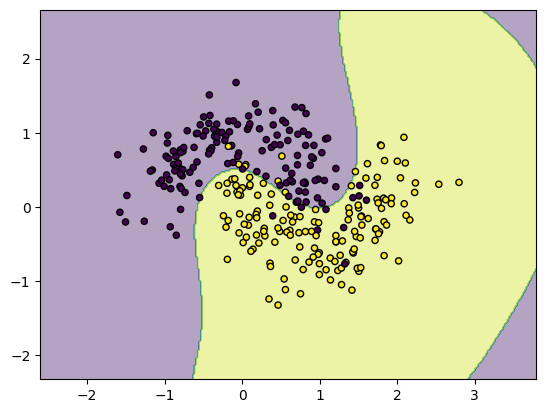

In [3]:
# поиск гаммы
param_grid = {'gamma': np.arange(0.1, 5.1, 0.1)}
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_gamma = grid_search.best_params_['gamma']
print(f"Лучшее значение gamma: {best_gamma}")

# результаты подбора в виде таблицы
results = GetDfFromCvResults(grid_search)
print(results)

# оценка точности на тестовой выборке
y_pred = grid_search.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность на отложенных данных: {accuracy:.4f}")

# отображение границы
PlotResultRegion(grid_search.best_estimator_, X, y, h=0.02)
plt.show()